# EV & Hybrid Sales
By John Sachs and Suzanne Polk

In [1]:
# Dependencies
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# Define the excel file routes
pev_xl = "Resources/10567_pev_sales.xlsx"
hev_xl = "Resources/10301_hev_sale.xlsx"

In [3]:
# Define the HEV Table. Exclude the static in the excel file.
hev = pd.read_excel(hev_xl, header = 2, usecols="B:BP", skipfooter=19)

In [4]:
# Define the PEV table.  Exclude the static, including the totals.
pev = pd.read_excel(pev_xl, header=2, usecols="B:J", skipfooter=11)

In [5]:
# Melt the HEV table. Our only id var, due to the set up, is Year.
hdf = hev.melt(id_vars=['Year'], var_name = 'Vehicle', value_name = 'Sales')

In [6]:
# Melt the PEV df, retaining type as another id_var
pdf = pev.melt(id_vars=['Vehicle','Type'], var_name='Year', value_name = 'Sales')

In [7]:
# To get both dataframes into a similar format, we now have to add a 'Type' column to the HEV df
hdf['Type'] = 'HEV'

In [8]:
pdf.head()

,Vehicle,Type,Year,Sales
0,Audi A3 Plug In,PHEV,2011,NaN
1,BMW Active E,EV,2011,NaN
2,BMW i3,EV,2011,NaN
3,BMW i8,PHEV,2011,NaN
4,BMW X5,PHEV,2011,NaN


In [9]:
hdf.head()

,Year,Vehicle,Sales,Type
0,1999,Volkswagen Touareg Hybrid,NaN,HEV
1,2000,Volkswagen Touareg Hybrid,NaN,HEV
2,2001,Volkswagen Touareg Hybrid,NaN,HEV
3,2002,Volkswagen Touareg Hybrid,NaN,HEV
4,2003,Volkswagen Touareg Hybrid,NaN,HEV


In [10]:
# Dropping all rows for which 'Sales' is null. All other columns have values,
# so we are only dropping where 'Sales' is null.
hdf = hdf.dropna()
pdf = pdf.dropna()

In [11]:
# Reorder the HEV df to have the same column order as the PEV df
hdf = hdf[['Vehicle','Type','Year','Sales']]

In [12]:
# Split the 'Vehicle' column. We will create a new dataframe, which will then be fed back into the original dataframe. 
# We split only once as none of the company names are more than one word. BMW, for instance, is treated as one word.
makemod = hdf.Vehicle.str.split(' ',1, expand=True)

In [13]:
makemod.head()

,0,1
12,Volkswagen,Touareg Hybrid
13,Volkswagen,Touareg Hybrid
14,Volkswagen,Touareg Hybrid
15,Volkswagen,Touareg Hybrid
16,Volkswagen,Touareg Hybrid


In [14]:
hdf['Make'] = makemod[0]
hdf['Model'] = makemod[1]
hdf.head()

,Vehicle,Type,Year,Sales,Make,Model
12,Volkswagen Touareg Hybrid,HEV,2011,221.0,Volkswagen,Touareg Hybrid
13,Volkswagen Touareg Hybrid,HEV,2012,250.0,Volkswagen,Touareg Hybrid
14,Volkswagen Touareg Hybrid,HEV,2013,118.0,Volkswagen,Touareg Hybrid
15,Volkswagen Touareg Hybrid,HEV,2014,30.0,Volkswagen,Touareg Hybrid
16,Volkswagen Touareg Hybrid,HEV,2015,16.0,Volkswagen,Touareg Hybrid


In [15]:
# Again, we apply the same split to the PEV dataframe.
makemod = pdf.Vehicle.str.split(' ',1, expand=True)

In [16]:
pdf['Make'] = makemod[0]
pdf['Model'] = makemod[1]
pdf.head()

,Vehicle,Type,Year,Sales,Make,Model
12,Chevrolet Volt,PHEV,2011,7671.0,Chevrolet,Volt
31,Mitsubishi i-MiEV,EV,2011,76.0,Mitsubishi,i-MiEV
32,Nissan LEAF,EV,2011,9674.0,Nissan,LEAF
35,Smart ED,EV,2011,310.0,Smart,ED
47,BMW Active E,EV,2012,965.0,BMW,Active E


In [17]:
# Now we drop the original vehicle column from both dataframes and reorder the columns to the desired order
pdf.drop(columns = ['Vehicle'], inplace = True)
hdf.drop(columns = ['Vehicle'], inplace = True)

In [18]:
# Reodering the dfs
pdf = pdf[['Make', 'Model','Type','Year','Sales']]
hdf = hdf[['Make', 'Model','Type','Year','Sales']]

In [19]:
pdf.head()

,Make,Model,Type,Year,Sales
12,Chevrolet,Volt,PHEV,2011,7671.0
31,Mitsubishi,i-MiEV,EV,2011,76.0
32,Nissan,LEAF,EV,2011,9674.0
35,Smart,ED,EV,2011,310.0
47,BMW,Active E,EV,2012,965.0


In [20]:
hdf.head()

,Make,Model,Type,Year,Sales
12,Volkswagen,Touareg Hybrid,HEV,2011,221.0
13,Volkswagen,Touareg Hybrid,HEV,2012,250.0
14,Volkswagen,Touareg Hybrid,HEV,2013,118.0
15,Volkswagen,Touareg Hybrid,HEV,2014,30.0
16,Volkswagen,Touareg Hybrid,HEV,2015,16.0


In [21]:
# Check for misspellings in 'Make'. We find that Acura is misspelled as Acrua.
hdf.Make.unique()

array(['Volkswagen', 'Toyota', 'Subaru', 'Saturn', 'Porsche', 'Nissan',
       'Mercury', 'Mercedes', 'Mazda', 'Lincoln', 'Lexus', 'Kia',
       'Infiniti', 'Hyundai', 'Honda', 'GMC', 'Ford', 'Dodge', 'Chrysler',
       'Chevrolet', 'Cadillac', 'Buick', 'BMW', 'Audi', 'Acura', 'Acrua'],
      dtype=object)

In [22]:
# Check for misspellings in 'Make'. To ensure consistency, we will rename VW to Volkswagen to reflect the HEV df.
pdf.Make.unique()

array(['Chevrolet', 'Mitsubishi', 'Nissan', 'Smart', 'BMW', 'Ford',
       'Honda', 'Tesla', 'Toyota', 'Cadillac', 'Fiat', 'Porsche', 'Kia',
       'Mercedes', 'VW', 'Volvo', 'Audi', 'Hyundai', 'Chrysler', 'Mini'],
      dtype=object)

In [23]:
# Implementing the changes mentioned above
hdf.Make = hdf.Make.replace({'Acrua':'Acura'})
pdf.Make = pdf.Make.replace({'VW':'Volkswagen'})

In [24]:
# Connecting to Postgres so we can create a SQL database in which to store both dataframes
rds_connection_string = "postgres:postgres@localhost:5432/ETL-EV_proj1"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [25]:
engine.table_names()

['ev_sales']

In [26]:
# Loading the converted table data into the database
hdf.to_sql(name='ev_sales', con=engine, if_exists='append', index=False)

In [27]:
# Appending the PEV df to the same table
pdf.to_sql(name='ev_sales', con=engine, if_exists='append', index=False)

In [28]:
# To confirm that the data has been added, we query the head and tail.
pd.read_sql_query('select * from ev_sales', con=engine).head()

,Make,Model,Type,Year,Sales
0,Volkswagen,Touareg Hybrid,HEV,2011,221.0
1,Volkswagen,Touareg Hybrid,HEV,2012,250.0
2,Volkswagen,Touareg Hybrid,HEV,2013,118.0
3,Volkswagen,Touareg Hybrid,HEV,2014,30.0
4,Volkswagen,Touareg Hybrid,HEV,2015,16.0


In [29]:
pd.read_sql_query('select * from ev_sales', con=engine).tail()

,Make,Model,Type,Year,Sales
567,Toyota,Prius Prime,PHEV,2017,20936.0
568,Volvo,S90 Plug In,PHEV,2017,112.0
569,Volvo,XC60,PHEV,2017,518.0
570,Volvo,XC90,PHEV,2017,2196.0
571,Volkswagen,e-Golf,EV,2017,3534.0


# Project Report

### Extract:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We obtained our information from __[energy.gov](https://afdc.energy.gov/data/)__. We used two tables, _U.S. Plug-in Electric Vehicle Sales by Model_ and _Hybrid Electric Vehicle (HEV) Sales by Model_. The files themselves are excel files containing summary tables with additional explanations, citations, and graphs. In other words, there was quite a bit of extraneous information for our purposes. In order to get the data that we actually want to upload to a database, we had to explore additional commands to limit the data being imported to pandas.  
    
   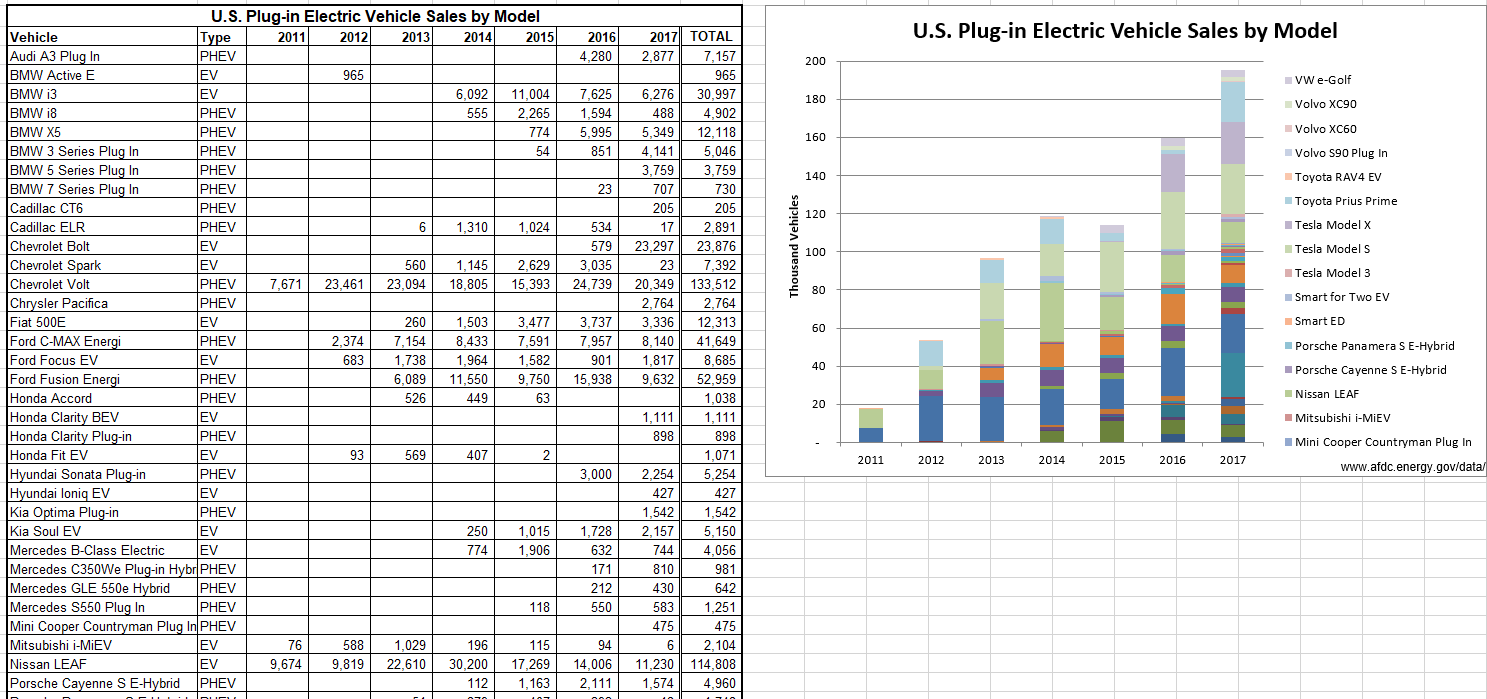
   Format of the PEV excel file
	  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We used the `.read_excel` method to specify the columns needed, the column names, and how many rows to exclude at the bottom (the citations and annotations). As this was new material, we had to utilize the documentation to learn how to use this method. The `skipfooter` parameter counts rows from the bottom, so there was a bit of guess and check involved. 
    
   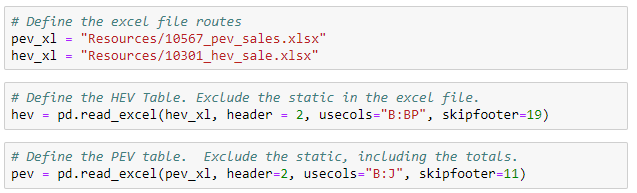

### Transform

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The excel files are not in the same format. The PEV table has vehicles on the rows and years as the columns while the HEV table uses the opposite orientation. Initially, we thought that we would have to `.transpose()` method prior to melting the tables to get them in the same format, but that ended up creating more issues with the columns. 

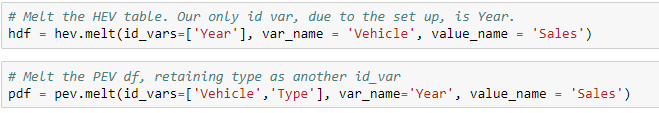

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Instead, we determined that by melting both tables, they effectively end up at the same point, just with the column order swapped around. The purpose of the `.melt()` method is to move the year values (or the vehicle, in the case of the HEV table) from the columns into the same rows as their sales figures. Again, this method was new, but it it was pretty intuitive. We are effectively unsummarizing the summary tables we started with. However, we are also left with many `NaN` values so we clean it up using `.dropna`. 

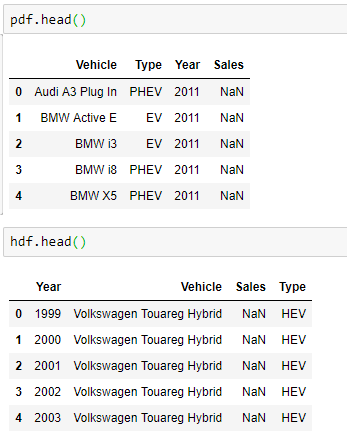

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Next, we want to extract the car company from the name of the vehicle because we can then use it later to categorize sales at a company level. To do so, we use the `.split()` method, only doing one split as none of the car company names are longer than one word. 

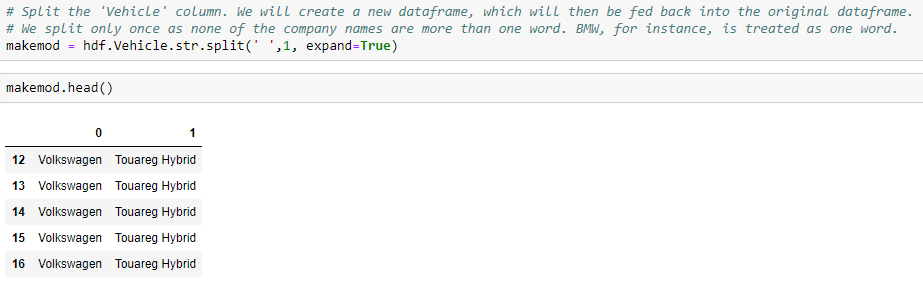

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We do this for both dataframes, creating a separate dataframe to store the split values, then feeding it back into the original dataframes and dropping the Vehicle column. Eventually, we are left with relatively clean dataframes, as seen below.

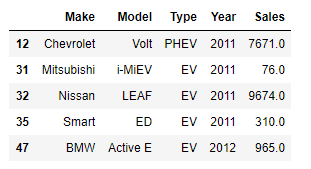

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The final step to cleaning is to check for misspellings and to ensure consistency. We see that Volkswagen is in the data as both spelled out and as VW. For consistency, we spell it out as Volkswagen. Additionally, Acura is misspelled for one of the vehicles, which we also correct. 

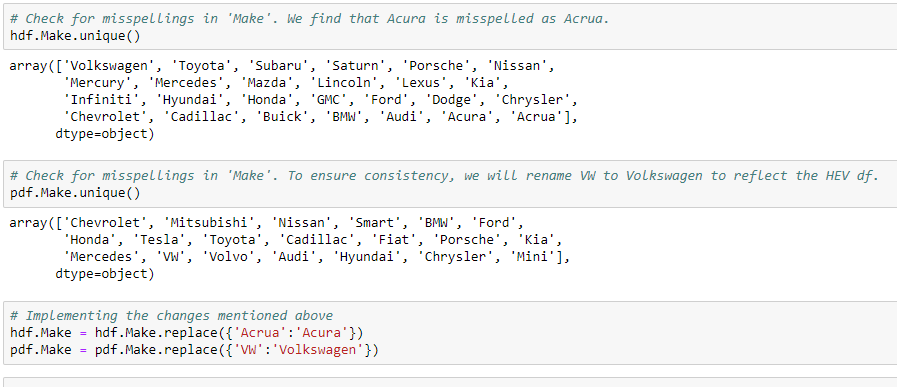

Now, the dataframes are in a good enough shape to load! 

### Load

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;By this point, we have two dataframes with the same columns. They could be merged in this notebook, but we decide to append one to the other in our Postgres. In pgAdmin, we create a table called `ev_sales` with a compound key of Model, Type, and Year. Initially, we intended on using a compound key of just Model and Year, but the 2015 Honda Accord is sold as both a regular hybrid and a plug in hybrid. 

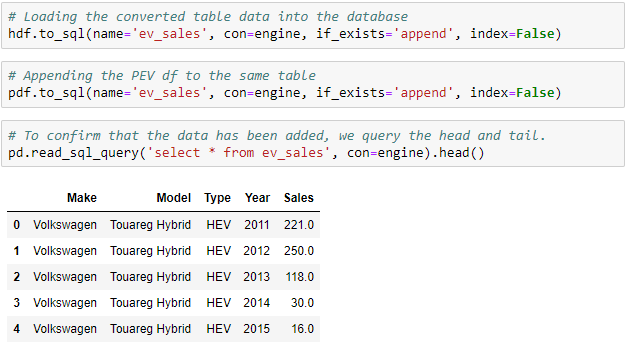

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Using the above commands, we see that our data are properly loaded into a the database.

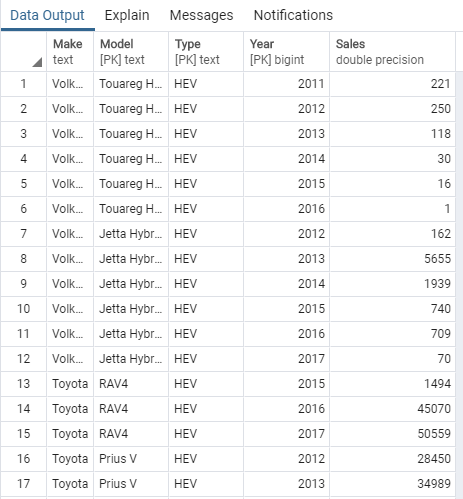